In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from utils import *

aspect_ratio = 16./9 # On HD projectors nowadays, this is the aspect ratio.
                     # so I make my figures using that ratio so they show up nicely in presentations.
BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"

In [101]:
filename ="2022-06-07_17-32-52_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

print(data.dtype.names)

('latitude', 'longitude', 'altitudem', 'ultrasonicHeightm', 'speedmps', 'distancem', 'max_altitudem', 'max_ascentm', 'max_speedmps', 'max_distancem', 'timemillisecond', 'datetimeutc', 'datetimelocal', 'satellites', 'pressurePa', 'temperatureF', 'voltagev', 'home_latitude', 'home_longitude', 'velocityXmps', 'velocityYmps', 'velocityZmps', 'pitchdeg', 'rolldeg', 'yawdeg', 'powerlevel', 'isflying', 'istakingphoto', 'remainPowerPercent', 'remainLifePercent', 'currentCurrent', 'currentElectricity', 'currentVoltage', 'batteryTemperature', 'dischargeCount', 'flightmode', 'isMotorsOn', 'isTakingVideo', 'Rc_elevator', 'Rc_aileron', 'Rc_throttle', 'Rc_rudder', 'Rc_gyro', 'timestamp', 'Battery_Cell1', 'Battery_Cell2', 'Battery_Cell3', 'Battery_Cell4', 'Battery_Cell5', 'Battery_Cell6', 'Dronetype', 'AppVersion', 'Planename', 'FlyControllerSerialNumber', 'RemoteSerialNumber', 'BatterySerialNumber', 'CENTER_BATTERYproductDate', 'CENTER_BATTERYserialNo', 'CENTER_BATTERYfullCapacity', 'CENTER_BATTERYp

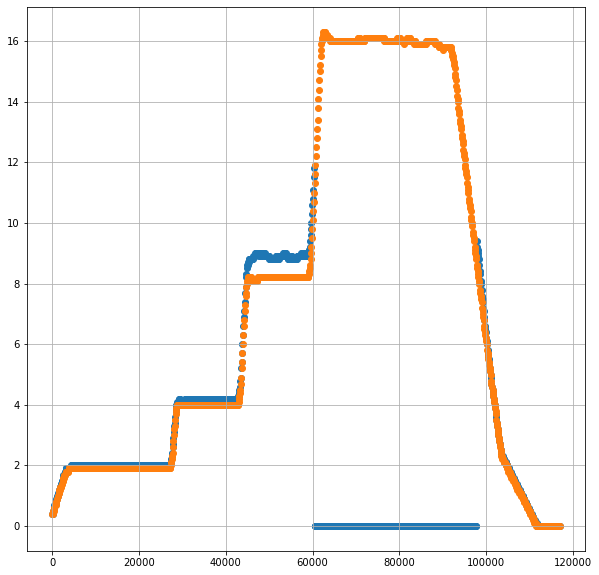

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data['timemillisecond'], data['ultrasonicHeightm'])
plt.scatter(data['timemillisecond'], data['altitudem'])
# plt.scatter(data['timemillisecond'], data['altitudeRaw'])
plt.grid(True)

# So the sonic can't see altitudes above 8 m

[ 1.10755248 -0.10458586]


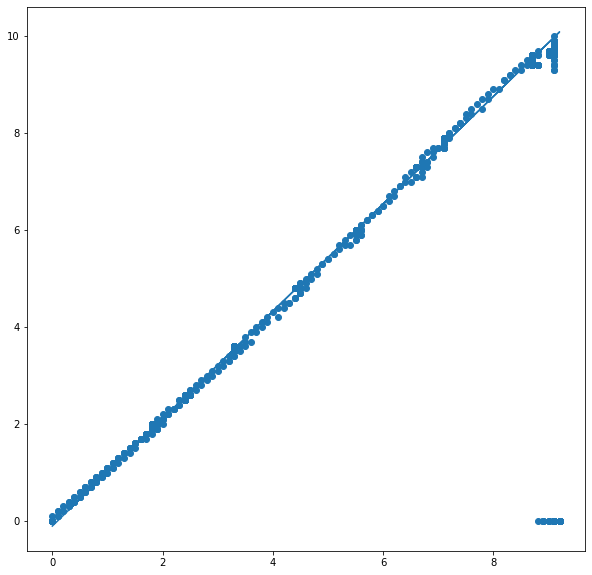

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data['altitudem'], data['ultrasonicHeightm'])

ind = data['altitudem'] < 8.
coeffs = np.polyfit(data['altitudem'][ind], data['ultrasonicHeightm'][ind], 1)
print(coeffs)

plt.plot(data['altitudem'], np.polyval(coeffs, data['altitudem']))

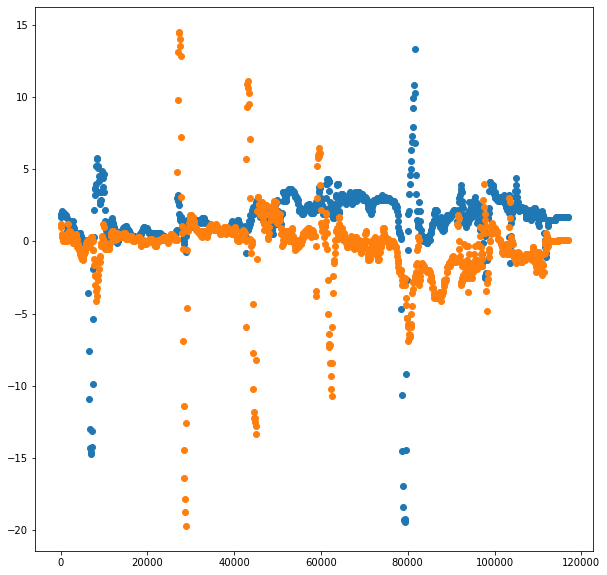

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data['timemillisecond'], data['pitchdeg'])
plt.scatter(data['timemillisecond'], data['rolldeg'])


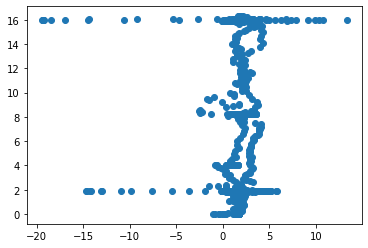

In [29]:
plt.scatter(data['pitchdeg'], data['altitudem'])

0.10000000000000009


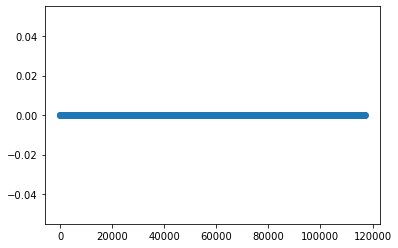

In [46]:
# plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], data['pitchdeg'])

print(np.median(np.abs(data['pitchdeg'][1:] - data['pitchdeg'][:-1])))

In [42]:
# https://math.stackexchange.com/questions/2563622/vertical-inclination-from-pitch-and-roll

def calc_tilt(pitch, roll):
    return np.degrees(np.arctan(np.sqrt(np.tan(np.radians(roll))**2+np.tan(np.radians(pitch))**2)))

print(calc_tilt(45., 90.))

90.0


[0.34186766 2.31199524]


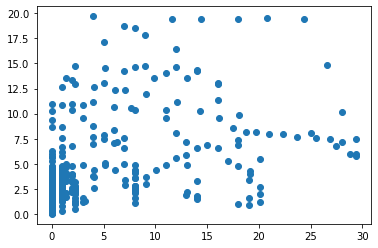

In [51]:
x = np.sqrt(data['velocityXRaw']**2 + data['velocityYRaw']**2)
y = calc_tilt(data['pitchdeg'], data['rolldeg'])

plt.scatter(x, y)

coeffs = np.polyfit(x, y, 1)
print(coeffs)

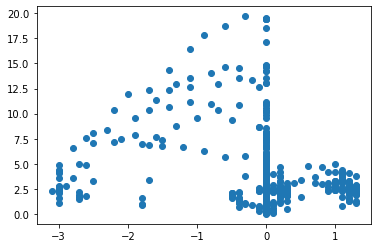

In [48]:
plt.scatter(data['velocityZmps'], calc_tilt(data['pitchdeg'], data['rolldeg']))

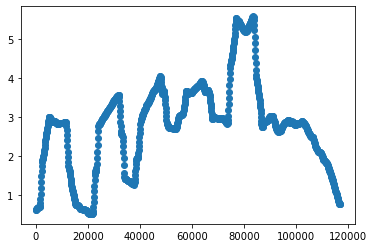

In [56]:
# Smooth tilt signal
N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(calc_tilt(data['pitchdeg'], data['rolldeg']), np.ones(N)/N, mode='same')

plt.scatter(data['timemillisecond'], filtered_tilt)

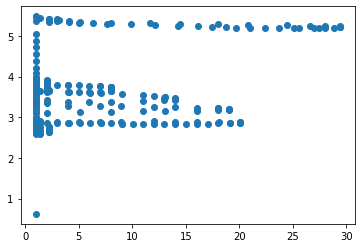

In [62]:
x = np.sqrt(data['velocityXRaw']**2 + data['velocityYRaw']**2)
N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(calc_tilt(data['pitchdeg'], data['rolldeg']), np.ones(N)/N, mode='same')

ind = x > 0
plt.scatter(x[ind], filtered_tilt[ind])

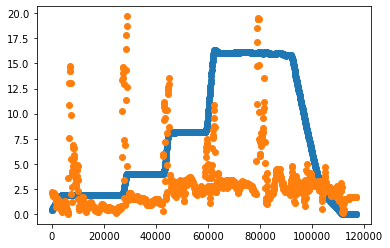

In [80]:
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], tilt)
# plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
# plt.ylim([0, 6])

(0.0, 20.0)

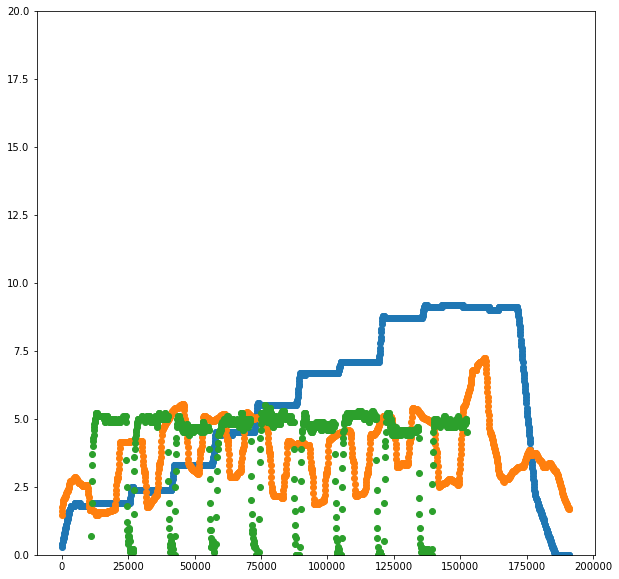

In [103]:
# 1, 2, 3, 4 ... m altitude
filename ="2022-06-07_17-32-52_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

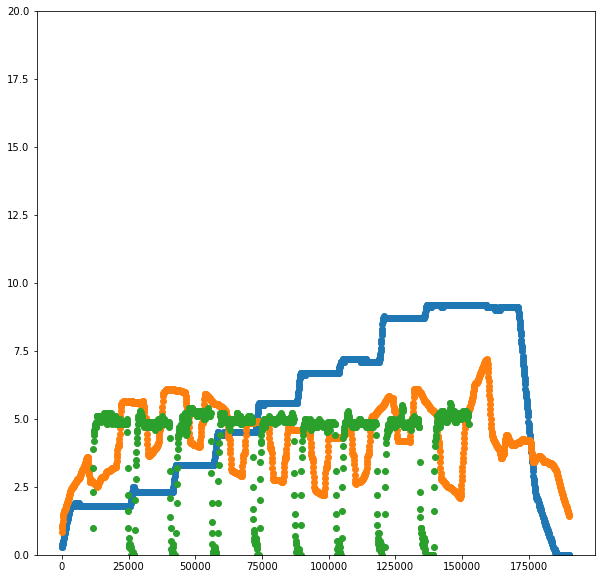

In [104]:
# 1, 2, 3, 4 ... m altitude
filename ="2022-06-07_17-28-57_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 6.0)

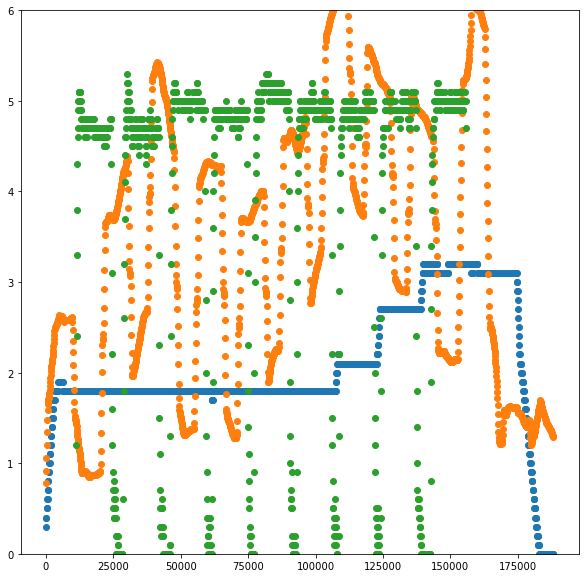

In [111]:
# 1, 2, 3, 4 ... m altitude
filename ="2022-06-07_17-24-10_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 6])

(0.0, 20.0)

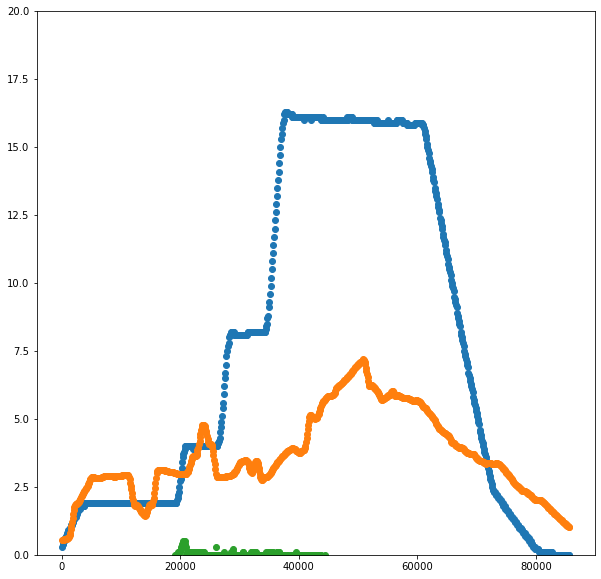

In [115]:
# 2, 4, 8, 16 m altitude but didn't set yaw signaling
filename ="2022-06-07_17-09-10_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

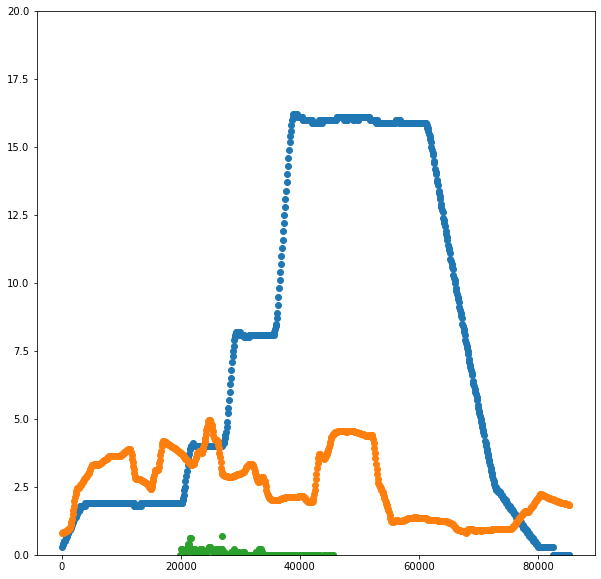

In [118]:
# 2, 4, 8, 16 m altitude with 5-s dwells but didn't set yaw signaling
filename ="2022-06-07_17-06-56_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

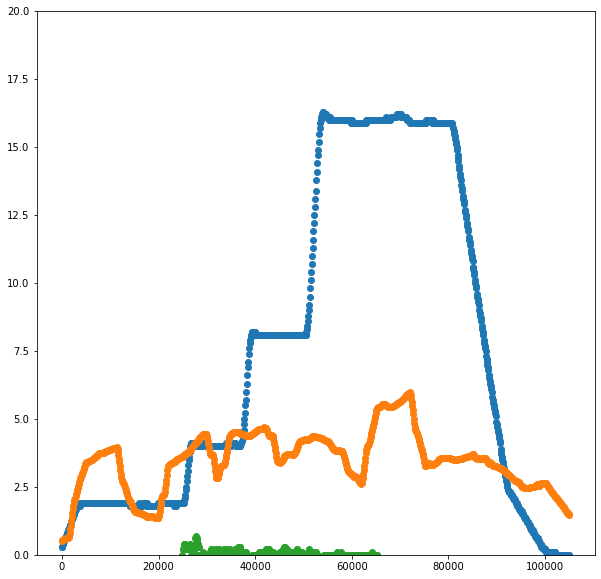

In [121]:
# 2, 4, 8, 16 m altitude with 5-s dwells but didn't set yaw signaling
filename ="2022-06-07_17-02-20_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

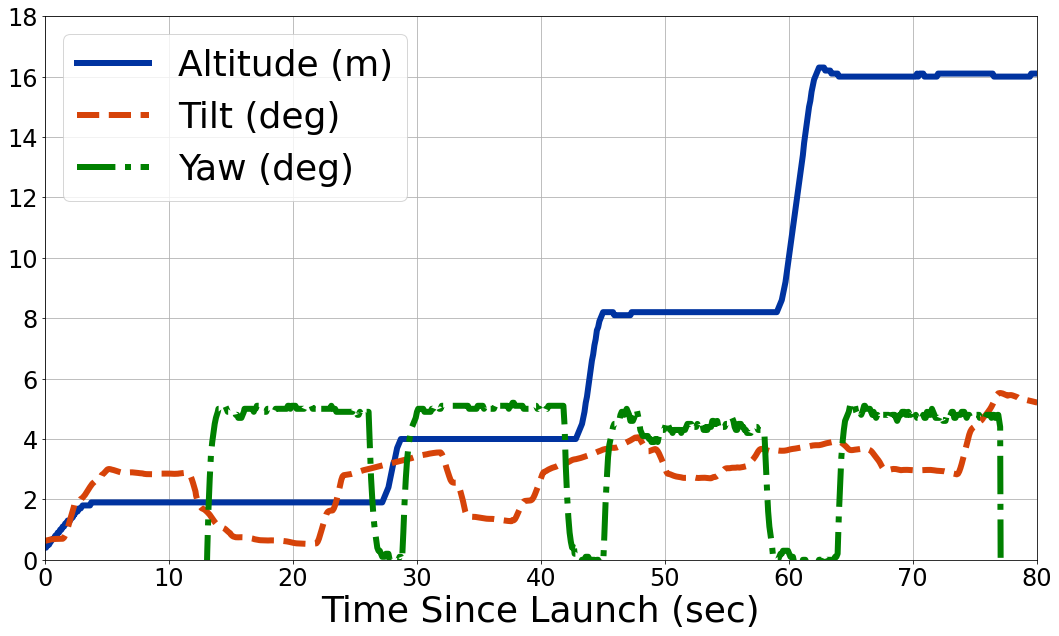

In [21]:
# 2, 4, 8, 16 m altitude with 10-s dwells with yaw signaling
filename ="2022-06-07_16-53-23_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10*aspect_ratio, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.plot(data['timemillisecond']/1000, data['altitudem'], lw=6, color=BoiseState_blue, label="Altitude (m)")
plt.plot(data['timemillisecond']/1000, filtered_tilt, lw=6, ls='--', color=BoiseState_orange, label="Tilt (deg)")
plt.plot(data['timemillisecond']/1000, data['yawdeg'], lw=6, ls='-.', color='green', label="Yaw (deg)")

plt.tick_params(labelsize=24)
plt.xlabel("Time Since Launch (sec)", fontsize=36)
plt.legend(loc='upper left', fontsize=36)
plt.grid(True)
plt.xlim([0, 80])
plt.ylim([0, 18])

fig.savefig("../../wind_profile_experiment_2022-06-07_16-53-23_v2.jpg", dpi=300, bbox_inches="tight")

(0.0, 20.0)

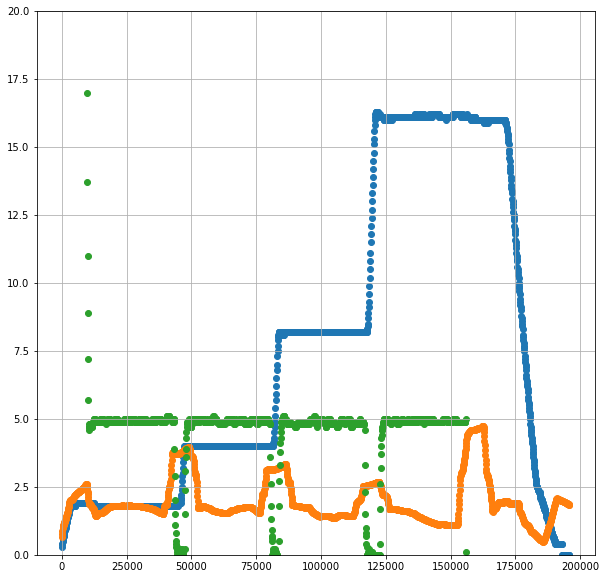

In [3]:
# 2, 4, 8, 16 m altitude with 30-s dwells with yaw signaling
filename ="2022-06-08_07-31-45_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

plt.grid(True)

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

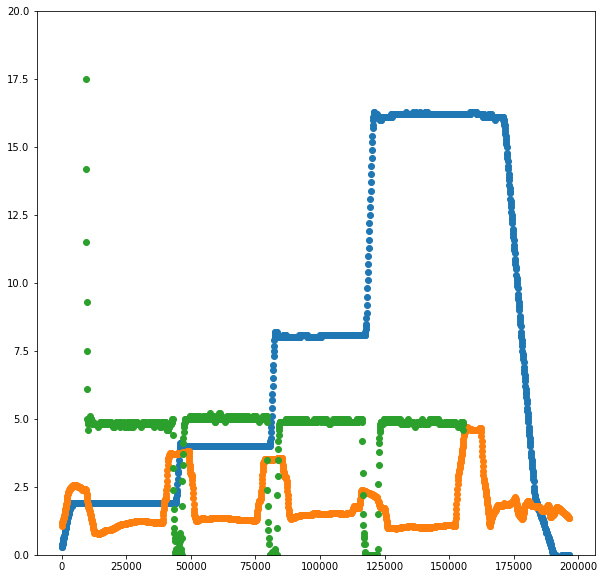

In [2]:
# 2, 4, 8, 16 m altitude with 30-s dwells with yaw signaling
filename ="2022-06-08_07-41-55_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

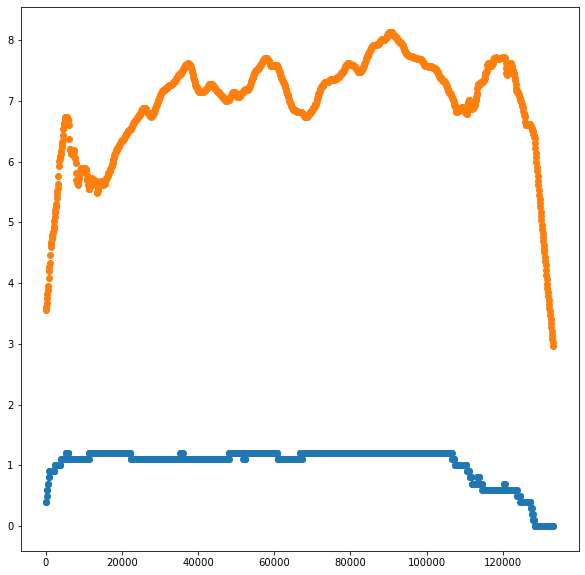

In [4]:
# First flight at Seal Beach
filename ="2022-06-08_17-00-17_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
# plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
# plt.ylim([0, 20])

(0.0, 20.0)

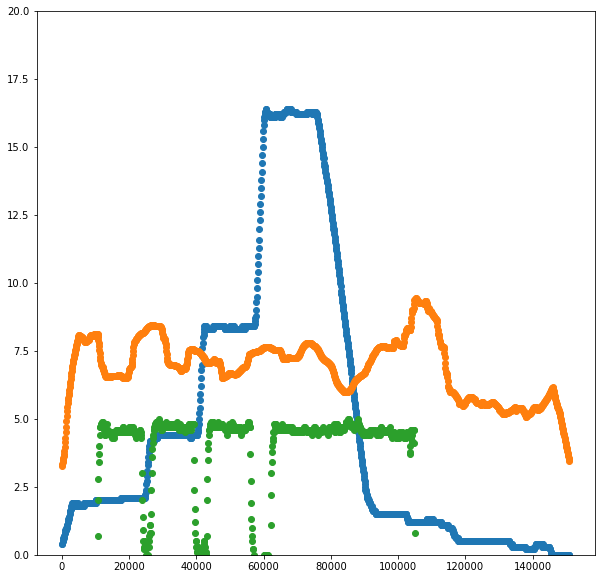

In [8]:
# First wind profile at Seal Beach
filename ="2022-06-08_17-40-07_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])